In [7]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as stools
from statsmodels.tsa.arima.model import ARIMA

In [8]:
data=pd.read_csv('raw_data.csv',low_memory=False,header=[0, 1])

In [9]:
y_fact=data.y['Unnamed: 208_level_1'].rename('y').to_frame()

In [10]:
y_train=y_fact[:40000]
y_test=y_fact[40000:]

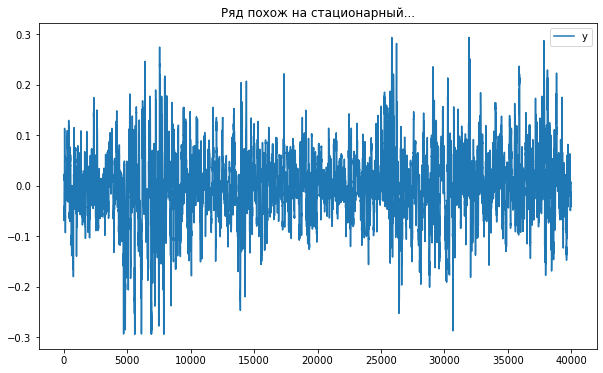

In [11]:
y_train.plot(figsize=(10,6),title='Ряд похож на стационарный...');

Ряд стационарен и на тренировочной и на полной выборке:

In [12]:
#проaверка на стационарность
stools.adfuller(y_train,regression='c')

(-26.43503866131047,
 0.0,
 52,
 39947,
 {'1%': -3.43051370992206,
  '5%': -2.8616123560221176,
  '10%': -2.5668085127873974},
 -269536.95116267685)

In [13]:
#проaверка на стационарность
stools.adfuller(y_fact,regression='c')

(-29.341577174492574,
 0.0,
 57,
 49942,
 {'1%': -3.430480944618592,
  '5%': -2.8615978748306916,
  '10%': -2.566800804858541},
 -334088.79830272787)

Подбираю параметры:

In [15]:
#минут 5 грузит
stools.arma_order_select_ic(y_train,max_ar=2,max_ma=3,ic='bic')

C:\Users\densm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\densm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\densm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'bic':                0              1              2              3
 0  -98745.399874 -150444.283644 -189093.779238 -213418.279279
 1 -259488.893015 -269273.071582 -269461.547111 -269451.321307
 2 -268220.503483 -269446.862448 -269493.084583 -269580.443059,
 'bic_min_order': (2, 3)}

{'bic':                0              1              2              3
             0  -98 745.399874 -150 444.283644 -189 093.779238 -213 418.279279
             1 -259 488.893015 -269 273.071582 -269 461.547111 -269 451.321307
             2 -268 220.503483 -269 446.862448 -269 493.084583 -269 580.443059,
 'bic_min_order': (2, 3)}

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

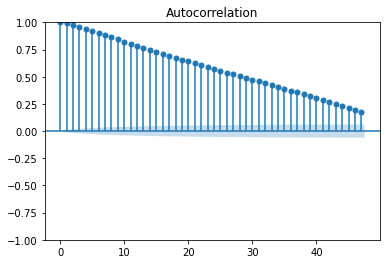

In [19]:
plot_acf(y_train);

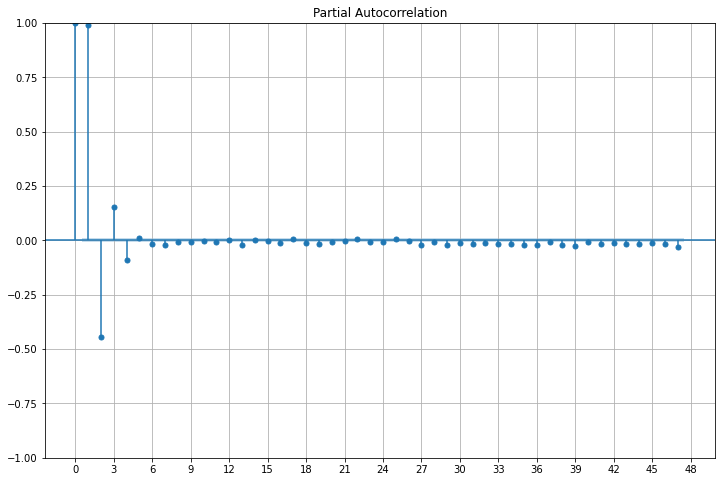

In [30]:
fig,ax=plt.subplots(figsize=(12,8))
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.grid()
plot_pacf(y_train,method='ywm',ax=ax);

In [31]:
from statsmodels.tsa.arima.model import ARIMA

In [33]:
arima=ARIMA(y_train.y,order=(2,0,3))

In [35]:
arima_fit=arima.fit()

In [37]:
y_pred=arima_fit.predict(end=50000)

<AxesSubplot:>

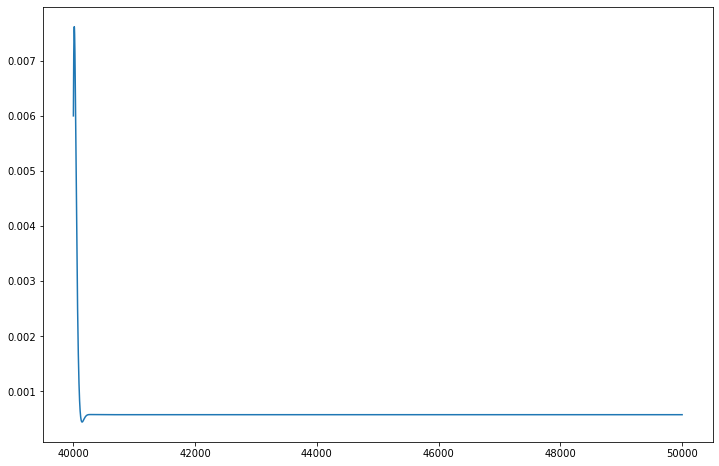

In [48]:
y_test.merge(y_pred.rename('y_pred').to_frame(),left_index=True,right_index=True).y_pred.plot(figsize=(12,8))